<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/Dirt_layer_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/Testing/portion only/Moroccan painting/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'[08] Conserving a Moroccan Portrait - Before.png'
'107.1 syllabus 1SAY1920 FINAL.gdoc'
 11_input_flipped_horizontal.png
 11_input_flipped_vertical.jpg
 11_input.png
 11_input_rotated_180_flipped_horizontal.png
 11_input_rotated_180_flipped_vertical.jpg
 11_input_rotated_180.png
 11_input_rotated_270_flipped_horizontal.png
 11_input_rotated_270_flipped_vertical.jpg
 11_input_rotated_270.png
 11_input_rotated_90_flipped_horizontal.png
 11_input_rotated_90_flipped_vertical.jpg
 11_input_rotated_90.png
 11_output_flipped_horizontal.png
 11_output_flipped_vertical.jpg
 11_output.png
 11_output_rotated_180_flipped_horizontal.png
 11_output_rotated_180_flipped_vertical.jpg
 11_output_rotated_180.png
 11_output_rotated_270_flipped_horizontal.png
 11_output_rotated_270_flipped_vertical.jpg
 11_output_rotated_270.png
 11_output_rotated_90_flipped_horizontal.png
 11_ou

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import cv2
from skimage import color

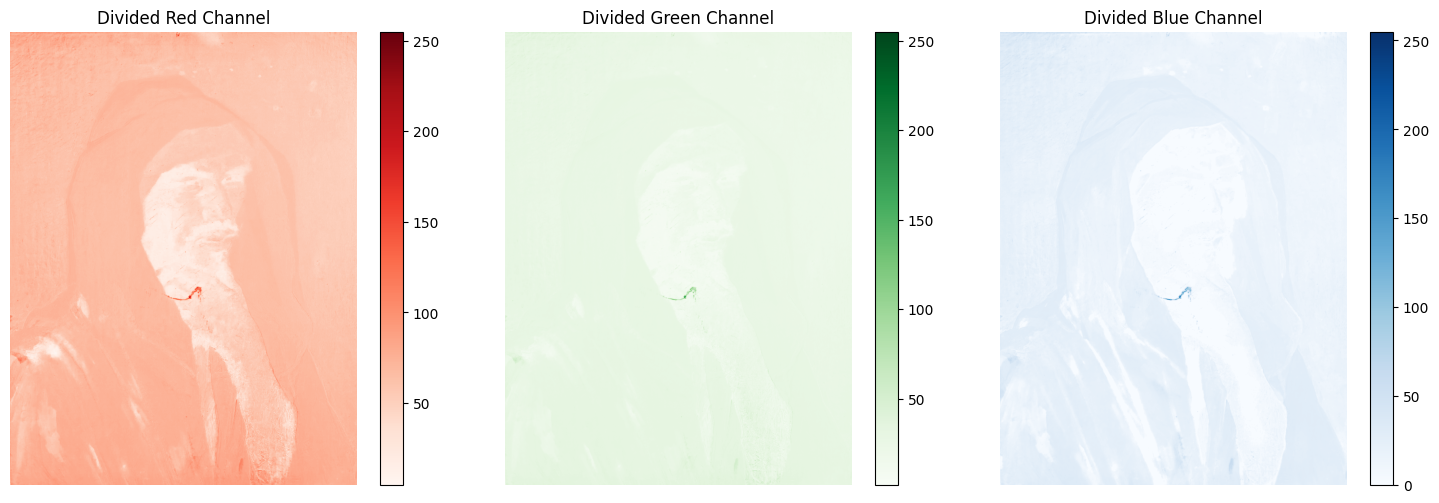

In [15]:
dirty = file_path + "[09-Before]Conserving a Moroccan Portrait.png"
clean = file_path + "[09-After] Conserving a Moroccan Portrait.png"
dirty = Image.open(dirty).convert('RGB')
clean = Image.open(clean).convert('RGB')


# Convert images to NumPy arrays
dirty_np = np.array(dirty, dtype=np.float32)
clean_np = np.array(clean, dtype=np.float32)

# Split the images into R, G, B channels
dirty_r, dirty_g, dirty_b = dirty_np[:, :, 0], dirty_np[:, :, 1], dirty_np[:, :, 2]
clean_r, clean_g, clean_b = clean_np[:, :, 0], clean_np[:, :, 1], clean_np[:, :, 2]

# Perform element-wise division for each channel, adding a small value to avoid division by zero
epsilon = 1e-5
divided_r = np.divide(dirty_r, clean_r + epsilon)
divided_g = np.divide(dirty_g, clean_g + epsilon)
divided_b = np.divide(dirty_b, clean_b + epsilon)

# Normalize each channel to be in the range [0, 255]
divided_r = (divided_r / np.max(divided_r) * 255).astype(np.uint8)
divided_g = (divided_g / np.max(divided_g) * 255).astype(np.uint8)
divided_b = (divided_b / np.max(divided_b) * 255).astype(np.uint8)

# Plot each channel separately with colorbars
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Red channel
im_r = axs[0].imshow(divided_r, cmap='Reds')
axs[0].set_title('Divided Red Channel')
axs[0].axis('off')
fig.colorbar(im_r, ax=axs[0], orientation='vertical')

# Plot the Green channel
im_g = axs[1].imshow(divided_g, cmap='Greens')
axs[1].set_title('Divided Green Channel')
axs[1].axis('off')
fig.colorbar(im_g, ax=axs[1], orientation='vertical')

# Plot the Blue channel
im_b = axs[2].imshow(divided_b, cmap='Blues')
axs[2].set_title('Divided Blue Channel')
axs[2].axis('off')
fig.colorbar(im_b, ax=axs[2], orientation='vertical')

# Adjust layout and save the plot
plt.tight_layout()
#plt.savefig('divided_channels.png', bbox_inches='tight')
plt.show()

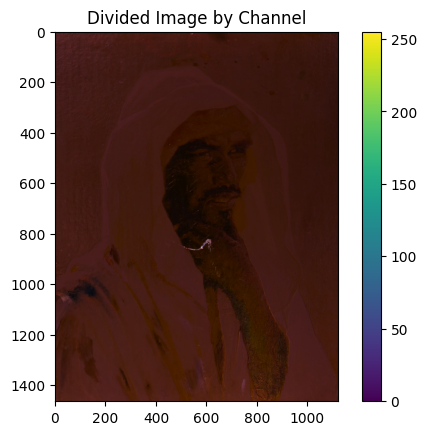

In [6]:
dirty = file_path + "[09-Before]Conserving a Moroccan Portrait.png"
clean = file_path + "[09-After] Conserving a Moroccan Portrait.png"
dirty = Image.open(dirty).convert('RGB')
clean = Image.open(clean).convert('RGB')

# Convert images to NumPy arrays
dirty_np = np.array(dirty, dtype=np.float32)
clean_np = np.array(clean, dtype=np.float32)

# Split the images into R, G, B channels
dirty_r, dirty_g, dirty_b = dirty_np[:, :, 0], dirty_np[:, :, 1], dirty_np[:, :, 2]
clean_r, clean_g, clean_b = clean_np[:, :, 0], clean_np[:, :, 1], clean_np[:, :, 2]

# Perform element-wise division for each channel, adding a small value to avoid division by zero
epsilon = 1e-5
divided_r = np.divide(dirty_r, clean_r + epsilon)
divided_g = np.divide(dirty_g, clean_g + epsilon)
divided_b = np.divide(dirty_b, clean_b + epsilon)

# Normalize each channel to be in the range [0, 255]
divided_r = (divided_r / np.max(divided_r) * 255).astype(np.uint8)
divided_g = (divided_g / np.max(divided_g) * 255).astype(np.uint8)
divided_b = (divided_b / np.max(divided_b) * 255).astype(np.uint8)

# Combine the channels back into an image
divided_np = np.stack((divided_r, divided_g, divided_b), axis=-1)
divided_image = Image.fromarray(divided_np)

# Display the resulting image
plt.imshow(divided_image)
plt.colorbar()
plt.title('Divided Image by Channel')
#plt.savefig('divided_image_by_channel.png', bbox_inches='tight')
plt.show()


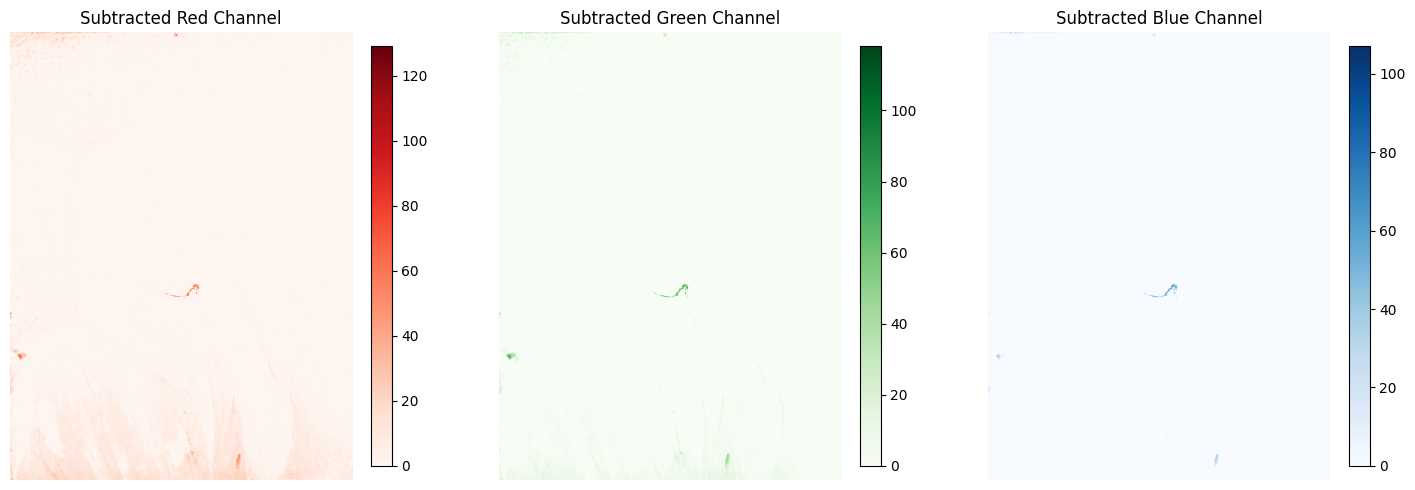

In [7]:
dirty = file_path + "[09-Before]Conserving a Moroccan Portrait.png"
clean = file_path + "[09-After] Conserving a Moroccan Portrait.png"
dirty = Image.open(dirty).convert('RGB')
clean = Image.open(clean).convert('RGB')

# Convert images to NumPy arrays
dirty_np = np.array(dirty, dtype=np.float32)
clean_np = np.array(clean, dtype=np.float32)

# Split the images into R, G, B channels
dirty_r, dirty_g, dirty_b = dirty_np[:, :, 0], dirty_np[:, :, 1], dirty_np[:, :, 2]
clean_r, clean_g, clean_b = clean_np[:, :, 0], clean_np[:, :, 1], clean_np[:, :, 2]

# Perform element-wise subtraction for each channel
subtracted_r = dirty_r - clean_r
subtracted_g = dirty_g - clean_g
subtracted_b = dirty_b - clean_b

# Normalize each channel to be in the range [0, 255]
subtracted_r = np.clip(subtracted_r, 0, 255).astype(np.uint8)
subtracted_g = np.clip(subtracted_g, 0, 255).astype(np.uint8)
subtracted_b = np.clip(subtracted_b, 0, 255).astype(np.uint8)

# Plot each channel separately with colorbars
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Red channel
im_r = axs[0].imshow(subtracted_r, cmap='Reds')
axs[0].set_title('Subtracted Red Channel')
axs[0].axis('off')
fig.colorbar(im_r, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)

# Plot the Green channel
im_g = axs[1].imshow(subtracted_g, cmap='Greens')
axs[1].set_title('Subtracted Green Channel')
axs[1].axis('off')
fig.colorbar(im_g, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

# Plot the Blue channel
im_b = axs[2].imshow(subtracted_b, cmap='Blues')
axs[2].set_title('Subtracted Blue Channel')
axs[2].axis('off')
fig.colorbar(im_b, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

# Adjust layout and save the plot
plt.tight_layout()
#plt.savefig('subtracted_channels_with_colorbars.png', bbox_inches='tight')
plt.show()

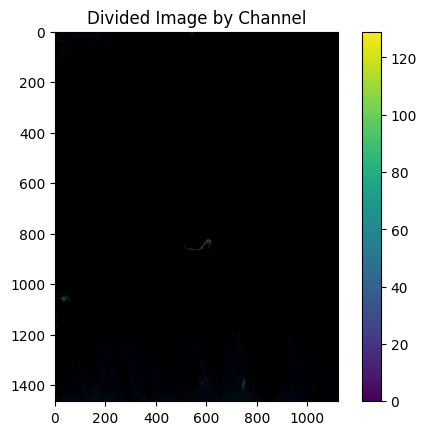

In [9]:
# Combine the channels back into an image
divided_np = np.stack((subtracted_b, subtracted_g, subtracted_r), axis=-1)
divided_image = Image.fromarray(divided_np)

# Display the resulting image
plt.imshow(divided_image)
plt.colorbar()
plt.title('Divided Image by Channel')
#plt.savefig('divided_image_by_channel.png', bbox_inches='tight')
plt.show()